# Analysing AirBnb 

TODO - Here we have a dataset from NYC Airbnb. We are cleaning and preparing the data to analyse it and bring out some valueable information. We will be using different functions of pandas library with matplotlib and seaborn for data visualization for better understanding.

## Downloading the Dataset

**TODO** - We are downloading airbnb dataset from kaggle.com by using library called opendatasets. It will require your username and a key which is unique and you can generate a json file from "MyAccount" section. Downloaded dataset will be in csv format.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prateekgour
Your Kaggle Key: ········


100%|██████████| 2.44M/2.44M [00:00<00:00, 83.0MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './new-york-city-airbnb-open-data'

In [5]:
import os
os.listdir(data_dir)

['AB_NYC_2019.csv', 'New_York_City_.png']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "zerotopandas-course-project-airbnb" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "prateekgour15/zerotopandas-course-project-airbnb" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/prateekgour15/zerotopandas-course-project-airbnb


'https://jovian.ml/prateekgour15/zerotopandas-course-project-airbnb'

## Data Preparation and Cleaning

**TODO** - Our data contains some missing values or incorrect values called outliers we will filter our data to get finished complete dataset. This process is called as data preparation and cleaning.



In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('./new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [12]:
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [13]:
df.shape

(48895, 16)

In [14]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
df.drop(['name','id','host_name','last_review','longitude','latitude'], axis=1, inplace=True)

In [16]:
df['reviews_per_month'].fillna(0, inplace=True)

In [17]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [18]:
df.describe()

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [19]:
import jovian

In [20]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "prateekgour15/zerotopandas-course-project-airbnb" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/prateekgour15/zerotopandas-course-project-airbnb


'https://jovian.ml/prateekgour15/zerotopandas-course-project-airbnb'

## Exploratory Analysis and Visualization

**TODO** - Now as we are done with data preparation and data cleaning, now we will perform some visualization which will furthur help us in understanding our data. We will use matplotlib and seaborn libraries to perform visualization.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [22]:
df['neighbourhood_group'].value_counts()       #counting unique values of neighbourhood_group

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

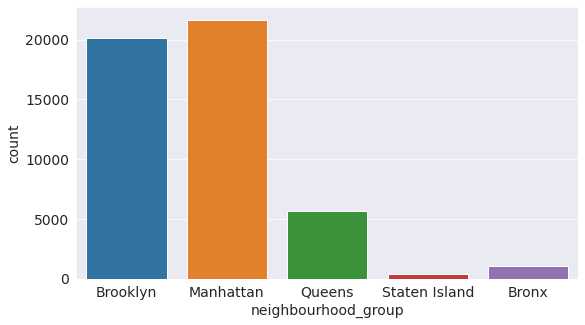

In [23]:
plot = sns.countplot(data = df, x = 'neighbourhood_group')              #plotting the above data as countplot

In [24]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

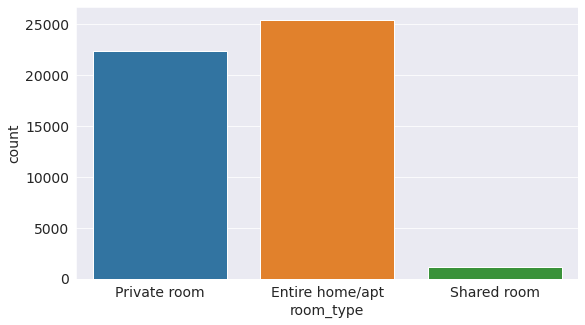

In [25]:
plot = sns.countplot(x="room_type", data=df)

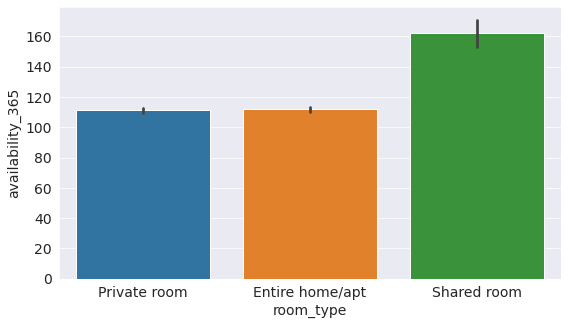

In [26]:
plot = sns.barplot(data=df, x = 'room_type' , y= 'availability_365')

In [27]:
maxx = df.reviews_per_month.max()
minn = df.reviews_per_month.min()
maxx,minn

(58.5, 0.0)

In [28]:
maxx = df.price.max()
minn = df.price.min()
maxx,minn

(10000, 0)

Text(0, 0.5, 'price')

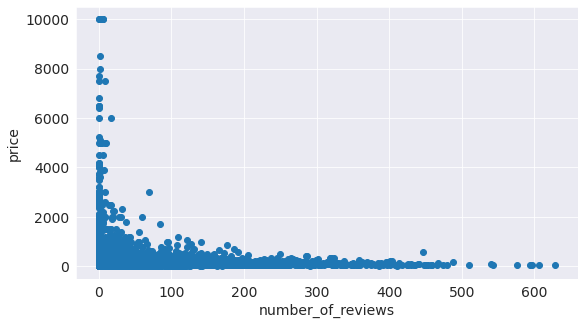

In [64]:
plot = plt.scatter(df.number_of_reviews,df.price)
plt.xlabel("number_of_reviews")
plt.ylabel("price")                          #plotting a scatter plot number_of_reviews vs price

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

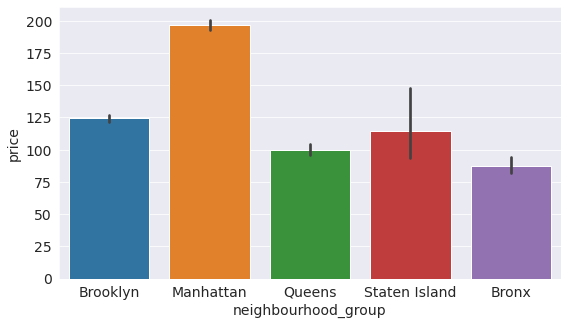

In [30]:
plot = sns.barplot(data = df, x='neighbourhood_group', y='price')

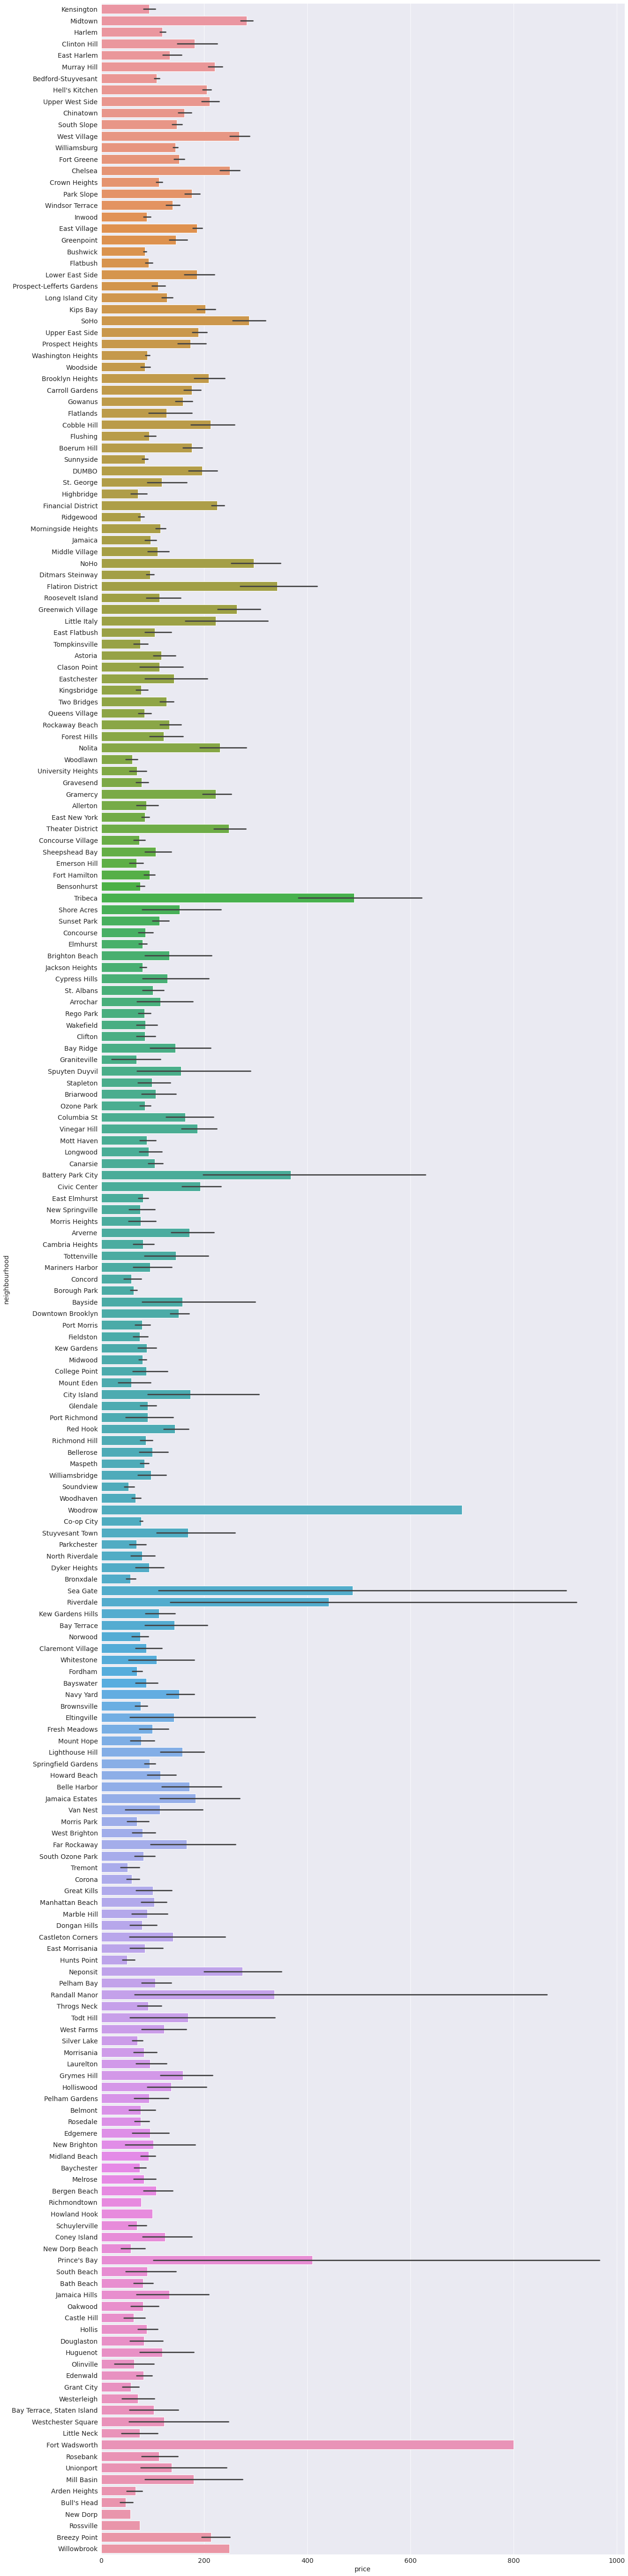

In [31]:
plt.figure(figsize=(20,100))
plot = sns.barplot(data = df, y = 'neighbourhood', x = 'price')

In [32]:
import jovian

In [33]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "prateekgour15/zerotopandas-course-project-airbnb" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/prateekgour15/zerotopandas-course-project-airbnb


'https://jovian.ml/prateekgour15/zerotopandas-course-project-airbnb'

## Asking and Answering Questions

TODO - Now as we are done with understanding our dataset completely. We will try to obtain valueable information from it.


#### Q1: TODO - Who is the top host with highest listing

In [34]:
import numpy as np        #importing numpy for futhur use

In [44]:
host=df.host_id.value_counts().head(10)          #extracting the top 10 host_id from dataset
host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [46]:
top_host_check=df.calculated_host_listings_count.max()
top_host_check

327

In [52]:
host_df = pd.DataFrame(host)                                   #creating a new dataset to polat nad understand
host_df.reset_index(inplace=True)
host_df.rename(columns = {'index':'Host_ID', 'host_id':'listing_Count'}, inplace=True)
host_df

,Host_ID,listing_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

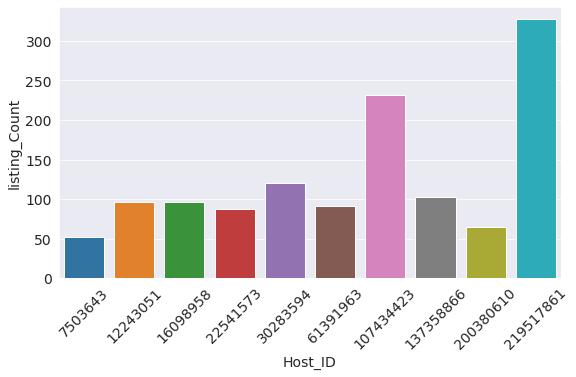

<Figure size 3600x1440 with 0 Axes>

In [58]:
plot = sns.barplot(data = host_df,x = 'Host_ID', y = 'listing_Count')
plt.figure(figsize=(50,20))
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)                       #below we see an almost even distribution

#### Q2: TODO - Average price to stay in top rated airbnb for a night

In [61]:
top_reviewed = df.nlargest(30, ['number_of_reviews'])       #using nlargest function to get top 30 values of desired column from dataset
top_reviewed

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,47621202,Queens,Jamaica,Private room,47,1,629,14.58,2,333
2031,4734398,Manhattan,Harlem,Private room,49,1,607,7.75,3,293
2030,4734398,Manhattan,Harlem,Private room,49,1,597,7.72,3,342
2015,4734398,Manhattan,Harlem,Private room,49,1,594,7.57,3,339
13495,47621202,Queens,Jamaica,Private room,47,1,576,13.40,2,173
10623,37312959,Queens,East Elmhurst,Private room,46,1,543,11.59,5,163
1879,2369681,Manhattan,Lower East Side,Private room,99,2,540,6.95,1,179
20403,26432133,Queens,East Elmhurst,Private room,48,1,510,16.22,5,341
4870,12949460,Brooklyn,Park Slope,Entire home/apt,160,1,488,8.14,1,269
471,792159,Brooklyn,Bushwick,Private room,60,3,480,6.70,1,0


In [62]:
avg_price=top_reviewed.price.mean()
print('Average price per night: {}'.format(avg_price))     #calculating average price pre night

Average price per night: 83.73333333333333


#### Q3: TODO - Which bnb is expensive according to neighbourhood_group

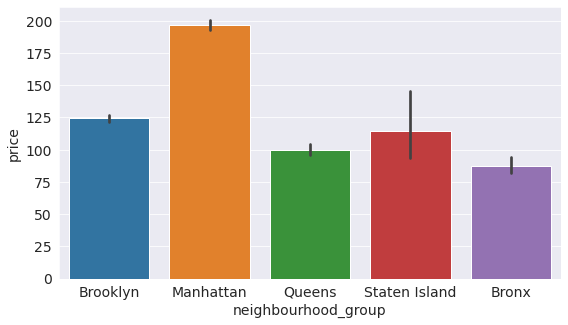

In [63]:
plot = sns.barplot(data = df, x='neighbourhood_group', y='price') #using seaborn library for plotting

In [ ]:
#The answer must be Manhattan as we can see from the graph.

#### Q4: TODO - What kind of property is expensive.

In [66]:
property_type=df.room_type.value_counts()                 #counting number of repetitions
property_type

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [68]:
property_df = pd.DataFrame(property_type)              #creating new dataframe
property_df.reset_index(inplace=True)
property_df.rename(columns = {'index':'Type', 'room_type':'Count'}, inplace=True)
property_df

,Type,Count
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


In [86]:
gk = df.groupby(['room_type'])
gk.first()                                                #grouping by room_type to get mean price for staying
mean_price = np.array(gk.price.mean())

In [87]:
property_df['maen_price'] = mean_price
property_df

,Type,Count,maen_price
0,Entire home/apt,25409,211.794246
1,Private room,22326,89.780973
2,Shared room,1160,70.127586


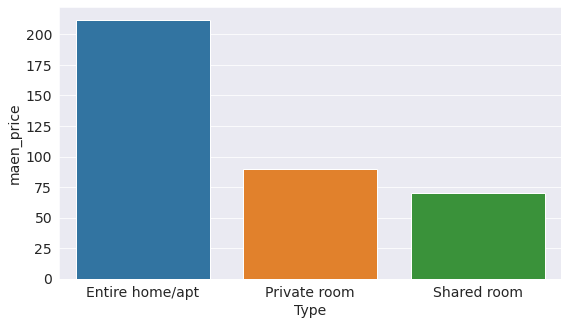

In [88]:
plot = sns.barplot(data = property_df, x = 'Type', y = 'maen_price')

#### Q5: TODO - What kind of property is much more avaliable

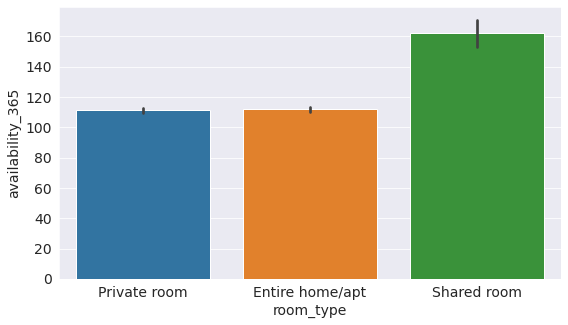

In [89]:
plot = sns.barplot(data=df, x = 'room_type' , y= 'availability_365')      #what kind of property is easily available to move in

In [90]:
import jovian

In [91]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "prateekgour15/zerotopandas-course-project-airbnb" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/prateekgour15/zerotopandas-course-project-airbnb


'https://jovian.ml/prateekgour15/zerotopandas-course-project-airbnb'

## Inferences and Conclusion

**TODO** - The provided data is very good and ready for anyone to analyse it. While going through the data I saw how much the company is being used and how rating and location can really matter in increasing your frquency of guests.

The provided interface has only limited analysis of this valuable data. I ahve plotted multple graphs to understand how one thing depends on other and how numbers work.

In [92]:
import jovian

In [93]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "prateekgour15/zerotopandas-course-project-airbnb" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/prateekgour15/zerotopandas-course-project-airbnb


'https://jovian.ml/prateekgour15/zerotopandas-course-project-airbnb'

## References and Future Work

**TODO** - For furthur development in this project regulation of traffic depending on various factors and be obtained. Applying machine learning algorithms for prediction of price can also be done. Use of more columns like longitude nad latitude could be brought into use (if any).

In [94]:
import jovian

In [95]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "prateekgour15/zerotopandas-course-project-airbnb" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/prateekgour15/zerotopandas-course-project-airbnb


'https://jovian.ml/prateekgour15/zerotopandas-course-project-airbnb'